In [1]:
!pip install -qU tavily-python langchain_community langchain_anthropic langgraph langchain_openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 17.3 MB/s eta 0:00:00


## How to use Tavily Search API

Tavily Search Documents : https://docs.tavily.com/docs/python-sdk/tavily-search/getting-started

Get API Key : https://app.tavily.com/home

In [ ]:
import os
os.environ["TAVILY_API_KEY"] = "tvly-..."

In [ ]:
from tavily import TavilyClient

tavily_client = TavilyClient()

**search**

- Return : dict with all related response fields

In [ ]:
response = tavily_client.search("What is AI Agent?", max_results=3) # , topic="news", days = 10 (최신)
print(response)

{'query': 'What is AI Agent?', 'follow_up_questions': None, 'answer': None, 'images': [], 'results': [{'title': 'What are AI Agents?- Agents in Artificial Intelligence Explained - AWS', 'url': 'https://aws.amazon.com/what-is/ai-agents/', 'content': 'What are AI Agents?- Agents in Artificial Intelligence Explained - AWS What are AI Agents? What are AI Agents? How can AWS help with your AI agent requirements? What are AI Agents? An artificial intelligence (AI) agent is a software program that can interact with its environment, collect data, and use the data to perform self-determined tasks to meet predetermined goals. How can AWS help with your AI agent requirements? Organizations can also use generative artificial intelligence (generative AI) and other Amazon Web Services (AWS) AI services to build their own AI agents. Train, operate, and scale your AI agents on AWS Trainium, a purpose-built ML learning accelerator for deep learning models Get started with AI agents on AWS by creating a

In [ ]:
response['results']

[{'title': 'What are AI Agents?- Agents in Artificial Intelligence Explained - AWS',
  'url': 'https://aws.amazon.com/what-is/ai-agents/',
  'content': 'What are AI Agents?- Agents in Artificial Intelligence Explained - AWS What are AI Agents? What are AI Agents? How can AWS help with your AI agent requirements? What are AI Agents? An artificial intelligence (AI) agent is a software program that can interact with its environment, collect data, and use the data to perform self-determined tasks to meet predetermined goals. How can AWS help with your AI agent requirements? Organizations can also use generative artificial intelligence (generative AI) and other Amazon Web Services (AWS) AI services to build their own AI agents. Train, operate, and scale your AI agents on AWS Trainium, a purpose-built ML learning accelerator for deep learning models Get started with AI agents on AWS by creating an account today.',
  'score': 0.92125154,
  'raw_content': None},
 {'title': 'AI Agents Explained

**get_search_context**

- Return : str containing the content and sources of the results

In [ ]:
context = tavily_client.get_search_context(query="What is AI Agent?")
print(context)

[{"url": "https://theconversation.com/what-is-an-ai-agent-a-computer-scientist-explains-the-next-wave-of-artificial-intelligence-tools-242586", "content": "What is an AI agent? What is an AI agent? As a computer scientist, I offer this definition: AI agents are technological tools that can learn a lot about a given environment, and then \u2013 with a few simple prompts from a human \u2013 work to solve problems or perform specific tasks in that environment. Many of today\u2019s AI agents are utility based, meaning they give more consideration to how to achieve their goals. Researchers at OpenAI and Google DeepMind say agents are another step on the path to artificial general intelligence or \u201cstrong\u201d AI \u2013 that is, AI that exceeds human capabilities in a wide variety of domains and tasks."}, {"url": "https://aws.amazon.com/what-is/ai-agents/", "content": "What are AI Agents?- Agents in Artificial Intelligence Explained - AWS What are AI Agents? What are AI Agents? How can 

**qna_search**

- Return : str, containing a short answer to the search query

In [ ]:
answer = tavily_client.qna_search(query="What is AI Agent?")
print(answer)

An AI agent is an autonomous software program that interacts with its environment, collects data, and performs self-determined tasks to meet predetermined goals. AI agents can observe their surroundings, make decisions, and take actions to achieve specific objectives, ranging from simple task-specific programs to sophisticated systems that combine perception, reasoning, and action capabilities. They are designed to perform jobs traditionally done by human agents in customer service, HR, IT help desks, and other areas, leveraging advancements in AI frameworks, model efficiency, and infrastructure improvements to enhance their capabilities.


## How to use Tavily Search **as Tool** in Langchain

- https://python.langchain.com/api_reference/community/tools/langchain_community.tools.tavily_search.tool.TavilySearchResults.html

- Tool that queries the Tavily Search API and gets back json

In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults

tool = TavilySearchResults(max_results=2)
tool.invoke("What's a 'node' in LangGraph?")

[{'url': 'https://medium.com/@kbdhunga/beginners-guide-to-langgraph-understanding-state-nodes-and-edges-part-1-897e6114fa48',
  'content': "Beginner’s Guide to LangGraph: Understanding State, Nodes, and Edges — Part 1 | by Kamal Dhungana | Medium Beginner’s Guide to LangGraph: Understanding State, Nodes, and Edges — Part 1 LangGraph — State, Node and Edge Explained Mainly, we will focus on various components of LangGraph: State, Node, and Edges, and how to build a complete graph from these components. Once we understand these components, we will be able to build relatively complex LangGraph-based agents. Each node represents a specific function or operation that processes the current state. Nodes can perform computations, modify the state, or generate outputs based on the input they receive. Follow 1.2K Followers Data scientist with a passion for AI, Regularly blogging about LLM and OpenAI's innovations,Sharing insights for AI community growth Follow"},
 {'url': 'https://blog.langchain

### **Binding tools**

- LLM이 질문에 적합한 Tool을 호출하기

- https://python.langchain.com/v0.1/docs/modules/model_io/chat/function_calling/#request-passing-tool-outputs-to-model

In [ ]:
os.environ["OPENAI_API_KEY"] = "sk-proj-..."

In [ ]:
# Example: Passing tool outputs to model
from langchain_core.tools import tool

@tool
def add(a: int, b: int) -> int:
    """Adds a and b.

    Args:
        a: first int
        b: second int
    """
    return a + b

@tool
def multiply(a: int, b: int) -> int:
    """Multiplies a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

tools = [add, multiply]

In [ ]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o")
llm_with_tools = llm.bind_tools(tools)

In [ ]:
query = "What is 3 * 12? Also, what is 11 + 49?"

llm_with_tools.invoke(query).tool_calls

[{'name': 'multiply',
  'args': {'a': 3, 'b': 12},
  'id': 'call_f1ZRUheF7Tz2TPRBwzSdpdpx',
  'type': 'tool_call'},
 {'name': 'add',
  'args': {'a': 11, 'b': 49},
  'id': 'call_x1Kdd6RuA0XbbfofDabsdW4Q',
  'type': 'tool_call'}]

In [ ]:
query = "What is 12 % 2?"

llm_with_tools.invoke(query).tool_calls

[]

### **Apply to Tavily Search**

In [ ]:
from langchain_openai import ChatOpenAI

tool = TavilySearchResults(max_results=2)
tools = [tool]

llm = ChatOpenAI(model="gpt-4o")
llm_with_tools = llm.bind_tools(tools) # TavilySearchResults(tools) 을 호출할 수 있도록 함

In [ ]:
llm_with_tools.invoke("안녕")

AIMessage(content='안녕하세요! 무엇을 도와드릴까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 81, 'total_tokens': 94, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_50cad350e4', 'finish_reason': 'stop', 'logprobs': None}, id='run-a9fb1056-5e15-445a-a309-e65bb72b4f13-0', usage_metadata={'input_tokens': 81, 'output_tokens': 13, 'total_tokens': 94, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [ ]:
llm_with_tools.invoke("What is Langgraph?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_MVfHPAPjzaaXX6So1ahhOK9V', 'function': {'arguments': '{"query":"Langgraph"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 84, 'total_tokens': 104, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_50cad350e4', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-4f1bc565-e281-4a51-a17f-e0c0d864a8b7-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'Langgraph'}, 'id': 'call_MVfHPAPjzaaXX6So1ahhOK9V', 'type': 'tool_call'}], usage_metadata={'input_tokens': 84, 'output_tokens': 20, 'total_tokens': 104, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_de

In [ ]:
llm_with_tools.invoke("What is Langgraph?").tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'Langgraph'},
  'id': 'call_MuHwzAOFbIrit1TPjjtSoXty',
  'type': 'tool_call'}]

## Langgraph - Web search + LLM = 검색 Chatbot

- Tool을 호출하고 그 결과를 모델(LLM)로 전달하기

- https://langchain-ai.github.io/langgraph/tutorials/introduction/#part-2-enhancing-the-chatbot-with-tools

### **Node** - 실제 작업을 수행하는 단위

**chatbot**

In [ ]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict): # 그래프의 상태를 정의하는 클래스
    messages: Annotated[list, add_messages] # 메시지 누적

graph_builder = StateGraph(State) # StateGraph 생성 (대화 흐름 관리)

def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)

**tools**

In [ ]:
import json
from langchain_core.messages import ToolMessage

class BasicToolNode:
    """
        A node that runs the tools requested in the last AIMessage.
        마지막 AIMessage에서 요청된 도구를 실행하는 노드
    """

    def __init__(self, tools: list) -> None:
        self.tools_by_name = {tool.name: tool for tool in tools} # ["tavily_search_results_json" : TavilySearchResults()]

    def __call__(self, inputs: dict):
        if messages := inputs.get("messages", []):
            message = messages[-1] # 마지막 message
        else:
            raise ValueError("No message found in input")
        outputs = []
        for tool_call in message.tool_calls: # 메시지에서 호출된 도구를 불러옴
            tool_result = self.tools_by_name[tool_call["name"]].invoke( # Tool 호출 실행
                tool_call["args"]
            )
            outputs.append( # Tool 호출 결과(ToolMessage) 추가
                ToolMessage(
                    content=json.dumps(tool_result),
                    name=tool_call["name"],
                    tool_call_id=tool_call["id"],
                )
            )
        return {"messages": outputs}

tool_node = BasicToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

### **Edge** - 노드 간의 연결

**조건부 엣지, 라우팅 (add_conditional_edges)**

In [ ]:
def route_tools(
    state: State,
):
    """
    Use in the conditional_edge to route to the ToolNode if the last message
    has tool calls. Otherwise, route to the end.
    """
    if isinstance(state, list):
        ai_message = state[-1]
    elif messages := state.get("messages", []):
        ai_message = messages[-1]
    else:
        raise ValueError(f"No messages found in input state to tool_edge: {state}")
    if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0: # if the last message has "tool_calls"
        return "tools"
    return END

# 조건부 엣지 연결
graph_builder.add_conditional_edges(
    "chatbot", # 시작 노드
    route_tools,
    {"tools": "tools", END: END}, # 반환값이 "tools" 면 "tools" 노드로, END 면 END로 이동
)

In [ ]:
# 엣지 연결
graph_builder.add_edge("tools", "chatbot") # 도구가 호출될 때마다 챗봇으로 돌아가 다음 단계를 결정
graph_builder.add_edge(START, "chatbot")
graph = graph_builder.compile()

### **그래프 시각화**

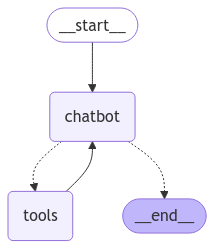

In [ ]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

### **실행**

In [ ]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}): # graph 노드 호출 결과 받아옴
        for value in event.values():
            print("Assistant:", value["messages"][-1].content) # AI 답변 출력

In [ ]:
while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User: 안녕
Assistant: 안녕하세요! 오늘 어떻게 도와드릴까요?
User: 랭체인이 뭐야?
Assistant: 
Assistant: [{"url": "https://www.samsungsds.com/kr/insights/the-concept-of-langchain.html", "content": "\ub7ad\uccb4\uc778\uc740 \uc5b8\uc5b4 \ubaa8\ub378 \uae30\ubc18\uc758 \uc560\ud50c\ub9ac\ucf00\uc774\uc158\uc744 \uac1c\ubc1c\ud558\ub294 \ud504\ub808\uc784\uc6cc\ud06c\ub85c, \ucc57\ubd07, Q&A, \ucf54\ub4dc \uc0dd\uc131 \ub4f1 \ub2e4\uc591\ud55c \uc791\uc5c5\uc744 \ud560 \uc218 \uc788\uc2b5\ub2c8\ub2e4. \ub7ad\uccb4\uc778\uc740 \ubaa8\ub4c8\uc2dd \ucd94\uc0c1\ud654\uc640 \ucd94\uc0c1\ud654 \uad6c\ud604\uc744 \ud1b5\ud574 \uc5b8\uc5b4 \ubaa8\ub378\uacfc \ub370\uc774\ud130 \uc18c\uc2a4\ub97c \uc5f0\uacb0\ud558\uace0 \uc0c1\ud638\uc791\uc6a9\ud558\uba70, \uae30\uc131\ud615 \uccb4\uc778\uacfc \uc0ac\uc6a9\uc790"}, {"url": "https://www.samsungsds.com/kr/insights/what-is-langchain.html", "content": "\uc778\uacf5\uc9c0\ub2a5\n\ub7ad\uccb4\uc778(LangChain)\uc774\ub780 \ubb34\uc5c7\uc778\uac00?\n\uc778\uc1c4\ud558\uae30\n\u